# [Introduction to Data Science](http://datascience-intro.github.io/1MS041-2022/)    
## 1MS041, 2022 
&copy;2022 Raazesh Sainudiin, Benny Avelin. [Attribution 4.0 International     (CC BY 4.0)](https://creativecommons.org/licenses/by/4.0/)

In [1]:
from Utils import showURL

In [2]:
showURL('https://en.wikipedia.org/wiki/Normal_distribution')

In [3]:
import numpy as np

In [4]:
lam = 2

$$f(x) = \lambda*e^{-\lambda x}$$

In [5]:
from sympy import var, integrate, exp

In [6]:
l = var('l')
x = var('x')

In [7]:
f = l*exp(-l*x)
f

l*exp(-l*x)

In [8]:
y = var('y')
f_y = integrate(f,(x,0,y))

In [9]:
f_y

1 - exp(-l*y)

In [10]:
from sympy import solve

In [11]:
# -(1/l)*ln(-x+1) = y

In [12]:
x = np.random.uniform(0,1,10000)

In [13]:
y = -(1/lam)*np.log(-x+1)

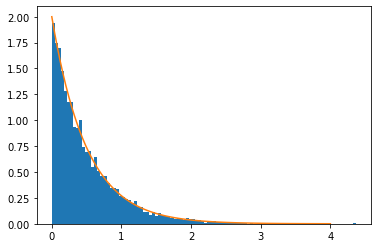

In [14]:
import matplotlib.pyplot as plt
_=plt.hist(y,density=True,bins=100)
z = np.linspace(0,4,100)
plt.plot(z,lam*np.exp(-lam*z))

In [15]:
showURL('https://www.sympy.org/en/index.html')

In [16]:
!ls data

'ls' is not recognized as an internal or external command,
operable program or batch file.


In [17]:
!head -n 100 data/co2_mm_mlo.txt

'head' is not recognized as an internal or external command,
operable program or batch file.


In [18]:
with open('data/co2_mm_mlo.txt',mode='r') as f:
    current_line = f.readline()
    while (current_line[0] == '#'):
        current_line = f.readline()
    

In [19]:
current_line

'1958   3    1958.208      315.71      315.71      314.62     -1\n'

In [20]:
[d for d in current_line.split(' ') if len(d) > 0]

['1958', '3', '1958.208', '315.71', '315.71', '314.62', '-1\n']

In [21]:
import re

In [22]:
data_line = re.sub('\n','',re.sub(' +',' ',current_line)).split(' ')
data_line

['1958', '3', '1958.208', '315.71', '315.71', '314.62', '-1']

In [23]:
schema = [int,int,float,float,float,float,int]

In [24]:
[sch(d) for sch,d in zip(schema,data_line)]

[1958, 3, 1958.208, 315.71, 315.71, 314.62, -1]

In [25]:
data = []
with open('data/co2_mm_mlo.txt',mode='r') as f:
    current_line = f.readline()
    while (current_line[0] == '#'):
        current_line = f.readline()
    data_line = re.sub('\n','',re.sub(' +',' ',current_line)).split(' ')
    data_line_typed = [sch(d) for sch,d in zip(schema,data_line)]
    data.append(data_line_typed)
    for line in f:
        data_line = re.sub('\n','',re.sub(' +',' ',line)).split(' ')
        data_line_typed = [sch(d) for sch,d in zip(schema,data_line)]
        data.append(data_line_typed)

In [26]:
import numpy as np
data_array = np.array(data,dtype=float)
data_array

array([[ 1.958000e+03,  3.000000e+00,  1.958208e+03, ...,  3.157100e+02,
         3.146200e+02, -1.000000e+00],
       [ 1.958000e+03,  4.000000e+00,  1.958292e+03, ...,  3.174500e+02,
         3.152900e+02, -1.000000e+00],
       [ 1.958000e+03,  5.000000e+00,  1.958375e+03, ...,  3.175000e+02,
         3.147100e+02, -1.000000e+00],
       ...,
       [ 2.018000e+03,  9.000000e+00,  2.018708e+03, ...,  4.055100e+02,
         4.090900e+02,  2.900000e+01],
       [ 2.018000e+03,  1.000000e+01,  2.018792e+03, ...,  4.060000e+02,
         4.093800e+02,  3.000000e+01],
       [ 2.018000e+03,  1.100000e+01,  2.018875e+03, ...,  4.080200e+02,
         4.099800e+02,  2.400000e+01]])

In [27]:
data_array.shape

(729, 7)

In [28]:
data_array[:,4:5].reshape(-1).shape

(729,)

In [29]:
average = data_array[:,4]

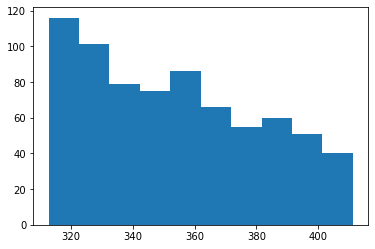

In [30]:
import matplotlib.pyplot as plt
_=plt.hist(average)

In [31]:
from Utils import basic_stats
basic_stats(average)

mean: 353.79	std: 27.53	skew: 0.34	kurtosis: 1.93


In [32]:
from Utils import makeEMF, makeEDF,plotEDF

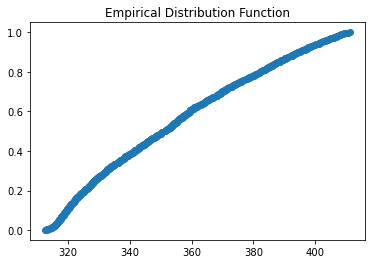

In [33]:
plotEDF(makeEDF(average))